# Items demand utility

Import all the needed modules

In [1]:
import pandas as pd
from pandas import ExcelWriter
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
sns.set(color_codes=True)

Import from the statistics file the columns needed

In [2]:
excel_file = 'Reported MO.xlsx'
df = pd.read_excel(excel_file)
df['Component no'] = df['Component no'].astype(str)
df.rename(columns={'Component no': 'Item no'}, inplace=True)
df.head()

,Product no,Product name,Work Center,MO no,Op no,Seq no,Date,Status,Item no,Component name,Reserved qty,Rep qty
0,65510030,GXK14-Droplet eliminator,645-060 PROFILE CUTTING & PUNCHING,1004352363,10,2,20190311,99,55144230,GX14-Top/bottom profile,4.0,4.0
1,65510030,GXK14-Droplet eliminator,645-060 PROFILE CUTTING & PUNCHING,1004352363,10,4,20190311,99,55144030,GX14-Side profile,4.0,4.0
2,65510030,GXK14-Droplet eliminator,645-060 PROFILE CUTTING & PUNCHING,1004352363,10,6,20190311,99,90722010,Profile for droplet catcher,33.6,33.6
3,65510030,GXK14-Droplet eliminator,645-060 PROFILE CUTTING & PUNCHING,1004352407,10,2,20190311,99,55144230,GX14-Top/bottom profile,4.0,4.0
4,65510030,GXK14-Droplet eliminator,645-060 PROFILE CUTTING & PUNCHING,1004352407,10,4,20190311,99,55144030,GX14-Side profile,4.0,4.0


Import from the master file the columns needed

In [3]:
master_file = 'Item master.xlsx'
df_master = pd.read_excel(master_file, usecols = ['Item no', 'Item name',
                                            'Product group descr'])
df_master.head()

,Item no,Item name,Product group descr
0,7ACEL1432,Termostato RCL,705 Fan coils (all types)
1,7ACEL1445,Termostato RCL,705 Fan coils (all types)
2,7ACTLO391,X-Support feet for AWC,705 Fan coils (all types)
3,7ACVF0481,Filter HAN-15,702 Splits & VRF
4,7HL023002,Roof Top HAN-13,703 Rooftop


Import supply data for suppliers

In [4]:
excel_file = 'Supply.xlsx'
df_supply = pd.read_excel(excel_file, usecols = ['Item no', 'Supplier'])
df_supply.drop_duplicates(inplace=True)
df_supply.head()

,Supplier,Item no
0,ES6023 SAINT-GOBAIN DISTRIBUC. CONSTRUC. SL,2000228
1,DK6248 BIBUS SINDBY A/S,90661103
2,ES5151 KOOLAIR S.A.,90700009
3,DK6254 ELTWIN A/S,90801106
4,KOOLCL Koolclima Internal,BNBRV


Import price data for items

In [5]:
excel_file = 'MMS003.xlsx'
df_price = pd.read_excel(excel_file, usecols = ['Item no', 'Prod cost'])

Get dates and number of week

In [6]:
df['Date'] = pd.to_datetime(df['Date'], format = '%Y%m%d')
df['Week'] = df['Date'].dt.week
df.head()

,Product no,Product name,Work Center,MO no,Op no,Seq no,Date,Status,Item no,Component name,Reserved qty,Rep qty,Week
0,65510030,GXK14-Droplet eliminator,645-060 PROFILE CUTTING & PUNCHING,1004352363,10,2,2019-03-11,99,55144230,GX14-Top/bottom profile,4.0,4.0,11
1,65510030,GXK14-Droplet eliminator,645-060 PROFILE CUTTING & PUNCHING,1004352363,10,4,2019-03-11,99,55144030,GX14-Side profile,4.0,4.0,11
2,65510030,GXK14-Droplet eliminator,645-060 PROFILE CUTTING & PUNCHING,1004352363,10,6,2019-03-11,99,90722010,Profile for droplet catcher,33.6,33.6,11
3,65510030,GXK14-Droplet eliminator,645-060 PROFILE CUTTING & PUNCHING,1004352407,10,2,2019-03-11,99,55144230,GX14-Top/bottom profile,4.0,4.0,11
4,65510030,GXK14-Droplet eliminator,645-060 PROFILE CUTTING & PUNCHING,1004352407,10,4,2019-03-11,99,55144030,GX14-Side profile,4.0,4.0,11


Create pivot table from the df

In [7]:
pivot_df = pd.pivot_table(df, values = 'Rep qty', index = 'Item no' , columns = 'Week', aggfunc=np.sum)
pivot_df = pivot_df.fillna(0)
pivot_df = pd.DataFrame(pivot_df.to_records())
pivot_df.head()

,Item no,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,0645000,33.0,99.0,33.0,0.0,0.0,33.0,0.0,0.0,0.0,...,0.0,0.0,231.0,33.0,33.0,0.0,66.0,33.0,0.0,0.0
1,0645001,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,39.0,39.0,0.0,0.0,0.0,39.0
2,0645002,45.0,45.0,0.0,0.0,0.0,45.0,45.0,0.0,0.0,...,0.0,0.0,0.0,0.0,45.0,45.0,0.0,0.0,0.0,0.0
3,0645003,0.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0,0.0,...,0.0,153.0,102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0645004,116.0,0.0,116.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,58.0,58.0,58.0,0.0,0.0,0.0,0.0,0.0,58.0


Stats of the weeks

In [18]:
col_len = len(pivot_df.columns)
pivot_df['Total'] = pivot_df.iloc[:, 1:col_len].sum(axis=1, numeric_only=True)
pivot_df['Mean'] = pivot_df.iloc[:, 1:col_len].mean(axis=1, numeric_only=True)
pivot_df['StD'] = pivot_df.iloc[:, 1:col_len].std(axis=1, numeric_only=True) 
pivot_df['CV'] = pivot_df['StD'] / pivot_df['Mean']
pivot_df['Min'] = pivot_df.iloc[:, 1:col_len].min(axis=1, numeric_only=True)
pivot_df['Q25'] = pivot_df.iloc[:, 1:col_len].quantile(q=0.25, axis=1, numeric_only=True).round(0)
pivot_df['Median'] = pivot_df.iloc[:, 1:col_len].median(axis=1, numeric_only=True)
pivot_df['Q67'] = pivot_df.iloc[:, 1:col_len].quantile(q=0.67, axis=1, numeric_only=True).round(0)
pivot_df['Q75'] = pivot_df.iloc[:, 1:col_len].quantile(q=0.75, axis=1, numeric_only=True).round(0)
pivot_df['Max'] = pivot_df.iloc[:, 1:col_len].max(axis=1, numeric_only=True)
pivot_df['Monthly'] = 4.33*pivot_df['Q67']
pivot_df['Monthly'] = pivot_df['Monthly'].round(0)
pivot_df.head()

,Item no,1,2,3,4,5,6,7,8,9,...,StD,CV,Min,Q25,Median,Q67,Q75,Max,Monthly,Total
0,0645000,33.0,99.0,33.0,0.0,0.0,33.0,0.0,0.0,0.0,...,46.836422,1.932042,0.0,0.0,0.0,33.0,33.0,231.0,143.0,1502.999432
1,0645001,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,50.273920,1.552123,0.0,0.0,0.0,39.0,39.0,195.0,169.0,2008.205780
2,0645002,45.0,45.0,0.0,0.0,0.0,45.0,45.0,0.0,0.0,...,63.165028,1.919285,0.0,0.0,0.0,45.0,45.0,270.0,195.0,2040.464355
3,0645003,0.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0,0.0,...,55.241841,1.596712,0.0,0.0,0.0,51.0,51.0,212.0,221.0,2145.028968
4,0645004,116.0,0.0,116.0,0.0,0.0,0.0,0.0,0.0,0.0,...,62.669358,1.682468,0.0,0.0,0.0,58.0,58.0,242.0,251.0,2309.405103


Merge datasets

In [10]:
df_master = pd.merge(df_master, df_supply, on='Item no') # Suppliers
df_master = pd.merge(df_master, df_price, on='Item no') # Price
df_master = pd.merge(df_master, pivot_df, on='Item no')
df_master.head()

,Item no,Item name,Product group descr,Supplier,Prod cost,1,2,3,4,5,...,Mean,StD,CV,Min,Q25,Median,Q67,Q75,Max,Monthly
0,5656,VK-90 Louvre shutter,208 Accessories Ventilation,S010 Systemair Sverige AB,103.735001,0.0,0.0,0.0,0.0,0.0,...,0.153846,1.109400,7.211103,0.0,0.0,0.0,0.0,0.0,8.0,0.00
1,6773,TG-D1/PT1000 Immersion sensor,606 Topvex Accessories,S010 Systemair Sverige AB,10.897000,0.0,0.0,0.0,0.0,0.0,...,0.019231,0.138675,7.211103,0.0,0.0,0.0,0.0,0.0,1.0,0.00
2,8413,FSD4 spring mount AXC,208 Accessories Ventilation,"ES5149 Accesorios Elásticos Lesol, S.A.",6.425000,0.0,4.0,0.0,0.0,0.0,...,0.923077,2.075498,2.248456,0.0,0.0,0.0,0.0,0.0,8.0,0.00
3,8414,FSD5 spring mount AXC,208 Accessories Ventilation,"ES5149 Accesorios Elásticos Lesol, S.A.",6.425000,0.0,8.0,0.0,0.0,0.0,...,3.923077,7.566298,1.928664,0.0,0.0,0.0,4.0,4.0,32.0,17.32
4,8606,FSD6 spring mount AXC,208 Accessories Ventilation,"ES5149 Accesorios Elásticos Lesol, S.A.",6.425000,0.0,4.0,0.0,0.0,0.0,...,2.153846,4.975960,2.310267,0.0,0.0,0.0,0.0,0.0,24.0,0.00


Create histograms

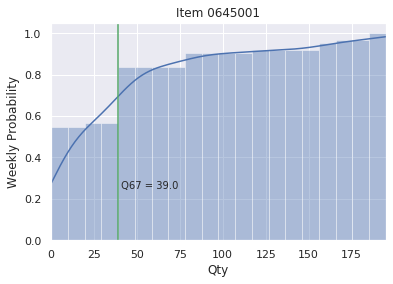

In [12]:
columns = pivot_df.columns[1:]
total_items = len(pivot_df['Item no'])
item = 1
item_no = pivot_df.loc[item][0]
item_q = pivot_df.loc[item]['Q67']
max_qty = pivot_df.loc[item]['Max']
sns.distplot(pivot_df.loc[item, columns], hist_kws={'cumulative': True}, kde_kws={'cumulative': True}, bins=20)
plt.xlabel('Qty')
plt.ylabel('Weekly Probability')
plt.title('Item ' + item_no)
plt.xlim(left=0, right=max_qty)
plt.grid(True)
plt.axvline(x=item_q, color='g')
plt.text(item_q, 0.25, ' Q67 = '+str(item_q))
plt.savefig('Items/'+item_no+'.png', dpi=100)

Import seaborn and display distribution

In [ ]:
'''
columns = pivot_df.columns[1:]
total_items = len(pivot_df['Component no'])

for item in range(total_items):
    item_no = pivot_df.loc[item][0]
    sns.distplot(pivot_df.loc[item, columns])
    plt.xlabel('Qty')
    plt.ylabel('Probability')
    plt.title('Weekly Histogram - Item ' + item_no)
    plt.xlim(left=0)
    plt.grid(True)
    plt.savefig('Items/'+item_no+'.png')
    plt.clf()
'''

Output the demand to Excel

In [15]:
name = 'Items demand based on MOs.xlsx'
writer = pd.ExcelWriter(name)
df_master.to_excel(writer, index = False)
writer.save()
print('Done bro!')

Done bro!
